In [1]:
import pandas as pd
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
data=pd.read_csv("/kaggle/input/tweets/Tweets.csv")

In [3]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
def check_df(dataframe,head=5):
    print("#################### Shape #################### ")
    print(dataframe.shape)
    print("#################### Types #################### ")
    print(dataframe.dtypes)
    print("#################### Head #################### ")
    print(dataframe.head(head))
    print("#################### Tail #################### ")
    print(dataframe.dtypes)
    print("#################### NA #################### ")
    print(dataframe.isnull().sum())

In [5]:
check_df(data)

#################### Shape #################### 
(14640, 15)
#################### Types #################### 
tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object
#################### Head #################### 
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301

In [6]:
review_data= data[["text","airline_sentiment"]]

In [7]:
review_data.shape

(14640, 2)

In [8]:
review_data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [9]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [10]:
len(data["airline_sentiment"])

14640

In [11]:
len(data["text"])

14640

In [12]:
review_data.columns

Index(['text', 'airline_sentiment'], dtype='object')

In [14]:
from textblob import TextBlob  

import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z  \t])|(\w+:\/\/\S+)", " ", tweet).split())


for tweet in data:
        analysis = TextBlob(clean_tweet(tweet))
        pol = analysis.sentiment.polarity
        sub = analysis.subjectivity
        pol_round = '%.3f' % pol
        sub_round = '%.3f' % sub

In [15]:
review_data=review_data[review_data["airline_sentiment"] != "neutral"]

In [16]:
review_data.shape

(11541, 2)

In [17]:
review_data.columns

Index(['text', 'airline_sentiment'], dtype='object')

In [18]:
review_data.head()

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [19]:
data["airline_sentiment"].isnull().sum()

0

In [20]:
review_data["airline_sentiment"].describe()

count        11541
unique           2
top       negative
freq          9178
Name: airline_sentiment, dtype: object

In [21]:
review_data["airline_sentiment"].value_counts()

airline_sentiment
negative    9178
positive    2363
Name: count, dtype: int64

In [22]:
sentiment_label=review_data.airline_sentiment.factorize()

In [23]:
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [24]:
len(sentiment_label) #0 - #1

2

In [25]:
tweet=review_data.text.values

In [26]:
tweet

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it", ...,
       '@AmericanAir thank you we got on a different flight to Chicago.',
       "@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc",
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"],
      dtype=object)

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [28]:
tokenizer=Tokenizer(num_words=5000)

In [29]:
tokenizer

In [30]:
tokenizer.fit_on_texts(tweet)

In [31]:
encoded_docs=tokenizer.texts_to_sequences(tweet)

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [33]:
padded_sequence=pad_sequences(encoded_docs,maxlen=200)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,SpatialDropout1D
from tensorflow.keras.layers import Embedding
from keras.layers import Embedding

In [35]:
vocab_size=len(tokenizer.word_index)+1
embedding_vector_lenght=32

In [36]:
model=Sequential()

In [37]:
model.add(Embedding(vocab_size,embedding_vector_lenght,input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50,dropout=0.5,recurrent_dropout=0.5)),
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [38]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
history=model.fit(padded_sequence,sentiment_label[0],validation_split=0.2,epochs=5,batch_size=32)

Epoch 1/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.7827 - loss: 0.5299 - val_accuracy: 0.8904 - val_loss: 0.2594
Epoch 2/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.8829 - loss: 0.2909 - val_accuracy: 0.9177 - val_loss: 0.1934
Epoch 3/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 22s 75ms/step - accuracy: 0.9249 - loss: 0.2079 - val_accuracy: 0.9207 - val_loss: 0.1954
Epoch 4/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 22s 76ms/step - accuracy: 0.9313 - loss: 0.1826 - val_accuracy: 0.9259 - val_loss: 0.1978
Epoch 5/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.9453 - loss: 0.1520 - val_accuracy: 0.9160 - val_loss: 0.2085


In [42]:
print(data.dtypes)


tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object


<Axes: >

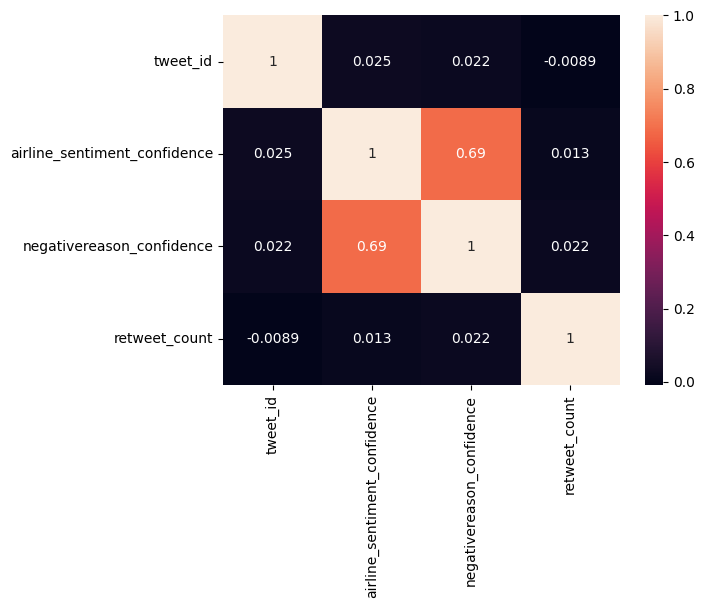

In [44]:
data_numeric = data.select_dtypes(include=['number', 'float'])
corr = data_numeric.corr()
sns.heatmap(corr, annot=True)

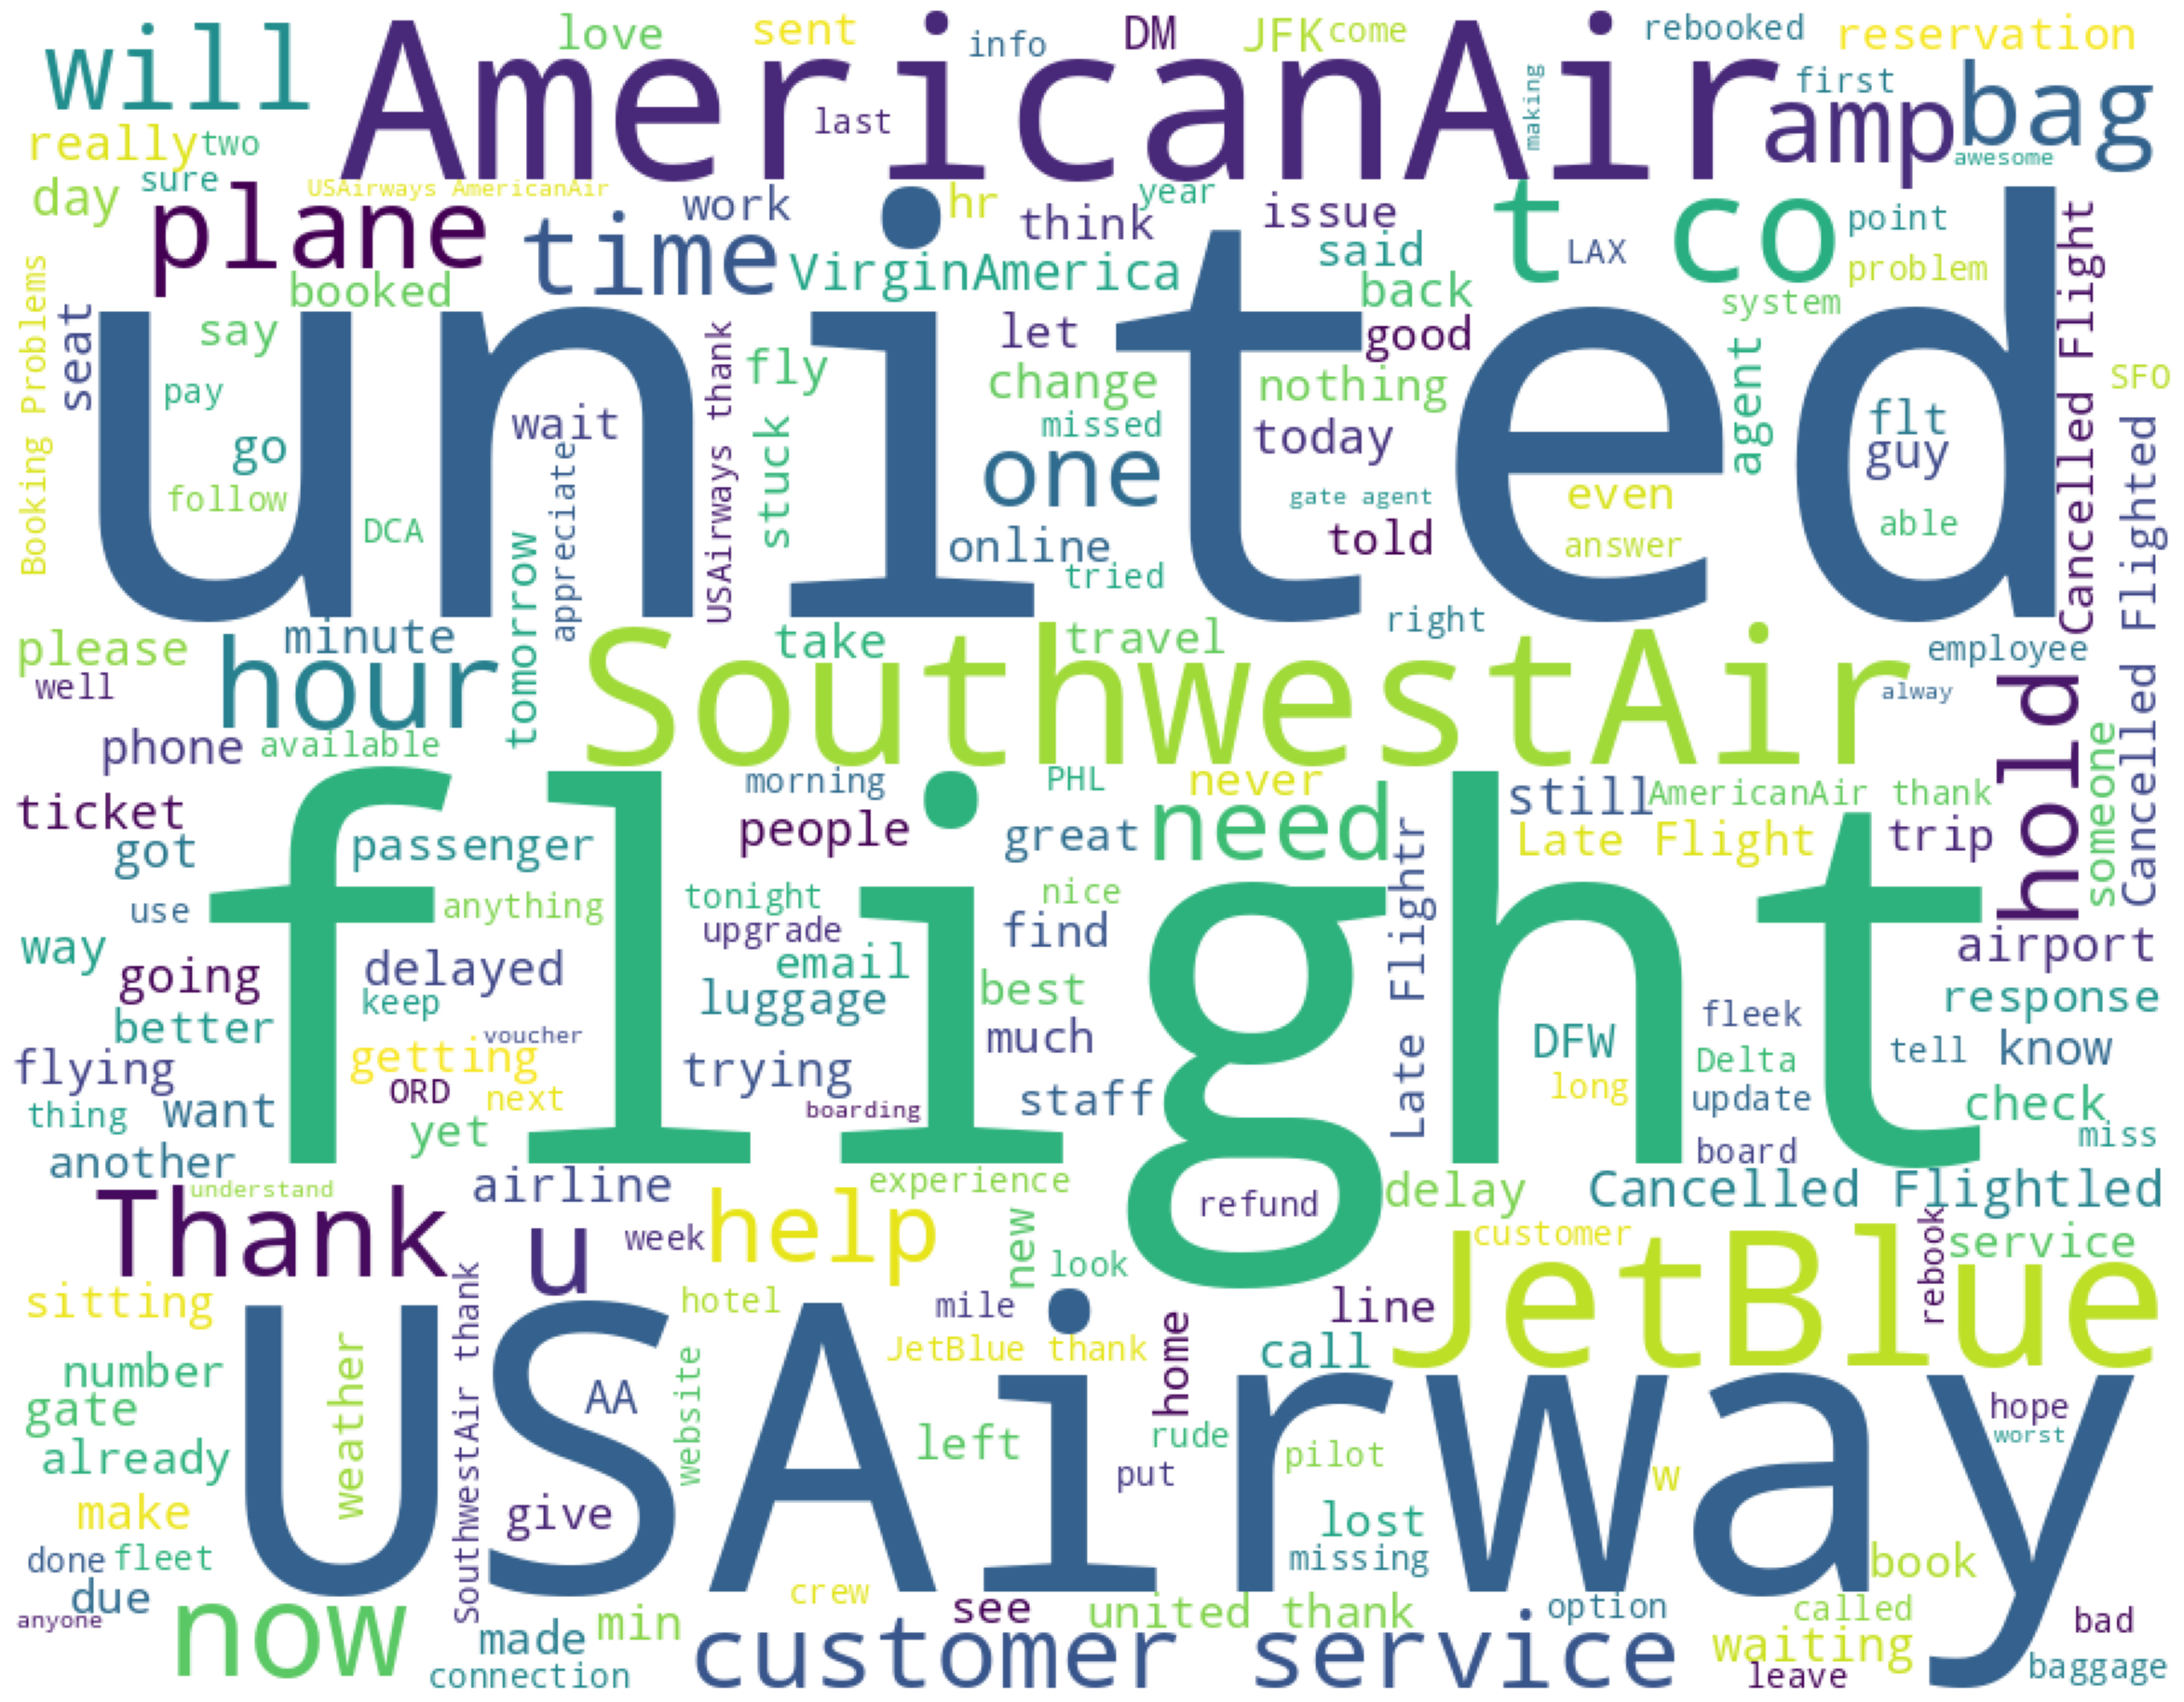

In [45]:
wordcloud=WordCloud(background_color="white",width=900,height=700)
text_cloud=wordcloud.generate(" ".join(data["text"]))
plt.figure(figsize=(30,30))
plt.imshow(text_cloud)
plt.axis("off")
plt.show()

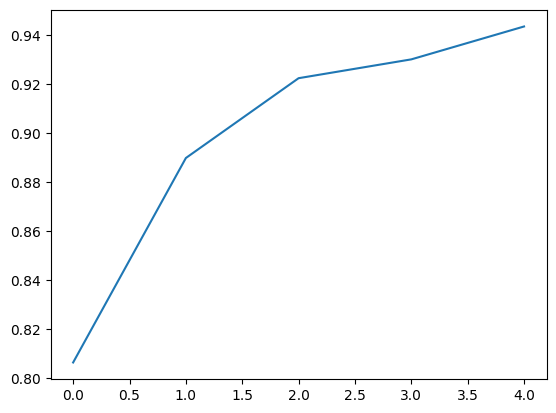

In [46]:
plt.plot(history.history["accuracy"],label="acc")

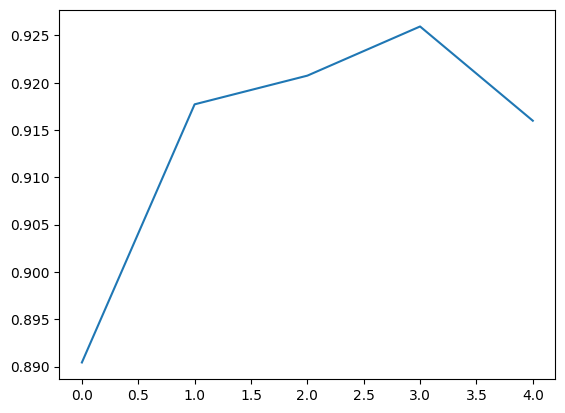

In [47]:
plt.plot(history.history["val_accuracy"],label="vall_acc")

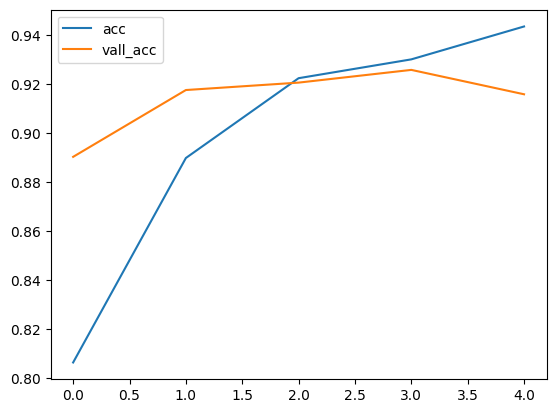

<Figure size 640x480 with 0 Axes>

In [48]:
plt.plot(history.history["accuracy"],label="acc")
plt.plot(history.history["val_accuracy"],label="vall_acc")
plt.legend()
plt.show()
plt.savefig("Accuracy plot.png")

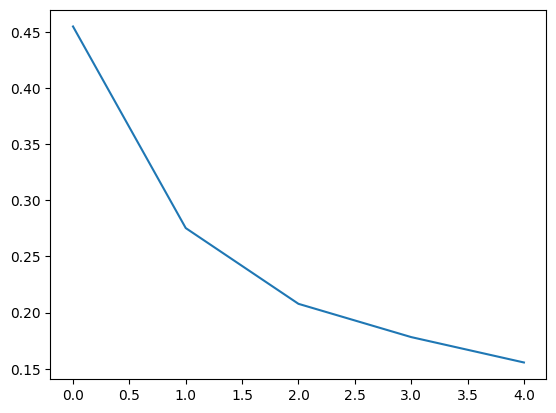

In [49]:
plt.plot(history.history["loss"],label="loss")

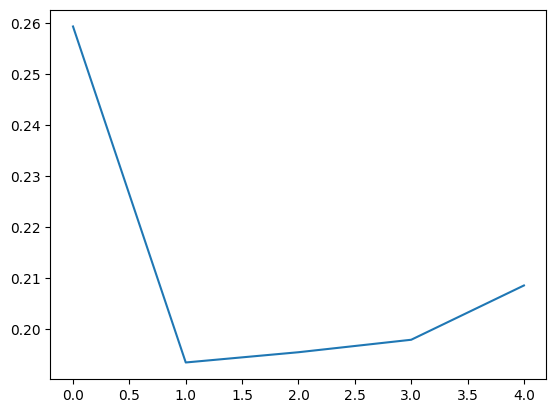

In [50]:
plt.plot(history.history["val_loss"],label="vall_loss")

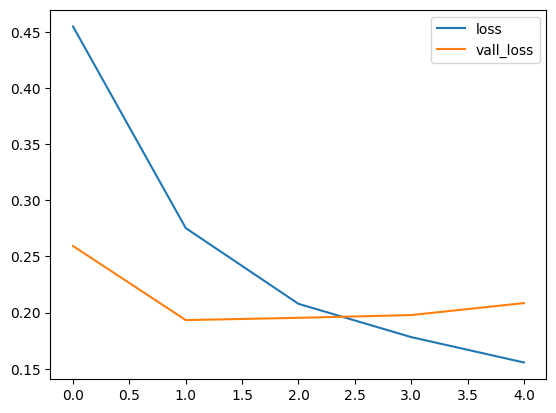

In [51]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="vall_loss")
plt.legend()
plt.show()

In [52]:
def predict_sentiment(text):
    tw=tokenizer.texts_to_sequences([text])
    tw=pad_sequences(tw,maxlen=200)
    prediction=int(model.predict(tw).round().item())
    print("Predict Label:",sentiment_label[1][prediction])

In [53]:
test_sentences=" I enjoyed my journey on this flight "
predict_sentiment(test_sentences)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Predict Label: positive


In [54]:
test_sentences2="You buy a ticket from THY. At least they give toast at THY. They also cut it up in Anatolia. They just distribute a little water. We knew Anatolia of THY, but they act as a subsidiary of SunExpress. thy is far from its old quality."
predict_sentiment(test_sentences2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predict Label: negative


In [55]:
test_sentences3="Qatar Airways have promised me a refund but have failed to make the refund. They refuse to answer emails and hang up when I phone them"
predict_sentiment(test_sentences3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predict Label: negative


In [56]:
test_sentences4="At the Istanbul Airport THY counter, Aylin Karadağlı provided the service we wanted for a long time with her calm and polite demeanor, and we would also like to thank you🙏🏻"
predict_sentiment(test_sentences4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predict Label: positive
